# Testing quick plotting

Here is a collection of different sweeps that all correctly quick plot

In [1]:
%matplotlib notebook
import numpy as np

import qcodes as qc

from typing import List, Dict, Tuple, Any
import matplotlib.pyplot as plt
import qcodes as qc
from qcodes import ParamSpec, new_data_set, new_experiment
from qcodes.dataset.plotting import plot_by_id

In [2]:
# if you just deleted your database file, you'll need to init a new one
from qcodes.dataset.sqlite_base import connect, init_db
conn = connect(qc.config['core']['db_location'], debug=False)
init_db(conn)

In [3]:
new_experiment('test_plot_by_id', 'nosample')

test_plot_by_id#nosample#73@./experiments.db
--------------------------------------------

In [4]:
# Make a handful of parameters to be used in the examples

x = ParamSpec('x', 'numeric', label='Voltage', unit='V')
t = ParamSpec('t', 'numeric', label='Time', unit='s')
y = ParamSpec('y', 'numeric', label='Voltage', unit='V', depends_on=[x])
y2 = ParamSpec('y2', 'numeric', label='Current', unit='A', depends_on=[x])
z = ParamSpec('z', 'numeric', label='Majorana number', unit='Anyon', depends_on=[x, t])

## A single, simple 1D sweep

In [5]:
data_set = new_data_set('1D-sweep')

In [6]:
data_set.add_parameter(x)
data_set.add_parameter(y)

In [7]:
xvals = np.linspace(-3.4, 4.2, 250)

for xnum in xvals:
    noise = np.random.randn()*0.1  # multiplicative noise yeah yeah
    data_set.add_result({'x': xnum, 'y': 2*(xnum+noise)**3 - 5*(xnum+noise)**2})


<IPython.core.display.Javascript object>


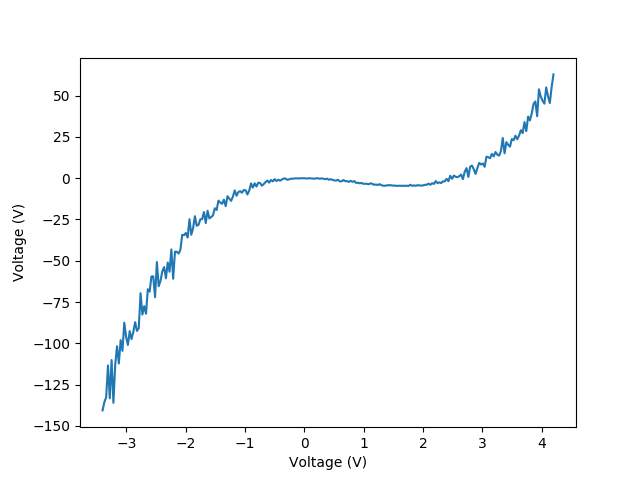

In [11]:
data_set.mark_complete()

plot = plot_by_id(data_set.run_id)

## Two interleaved 1D sweeps

In [12]:
data_set = new_data_set('interleaved-1Ds')

In [13]:
data_set.add_parameter(x)
data_set.add_parameter(y)
data_set.add_parameter(y2)

In [14]:
xvals = np.linspace(-5, 5, 250)

for xnum in xvals:
    data_set.add_result({'x': xnum, 'y': xnum**2})
    data_set.add_result({'x': xnum, 'y2': -xnum**2})
data_set.mark_complete()

<IPython.core.display.Javascript object>


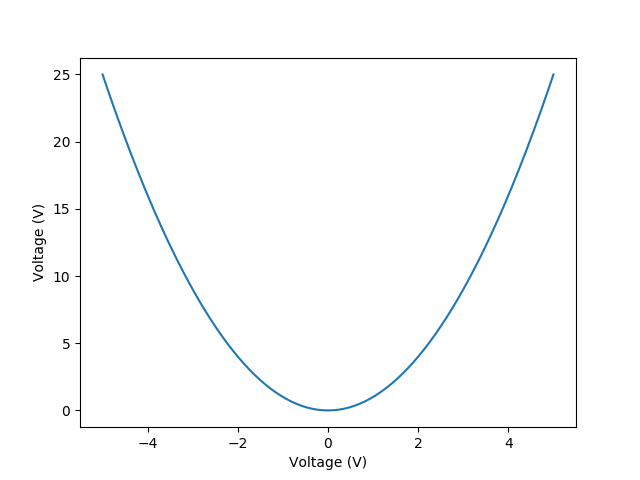

<IPython.core.display.Javascript object>


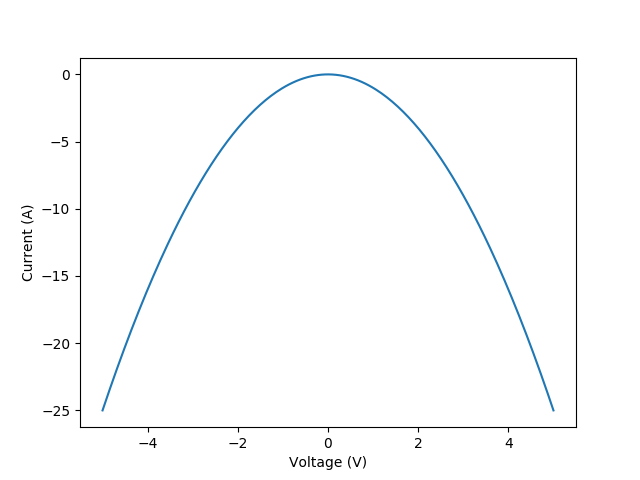

In [15]:
plot = plot_by_id(data_set.run_id)

## Regular 2D rectangular sweep scan

In [16]:
data_set = new_data_set('regular-2D-scan')
data_set.add_parameter(x)
data_set.add_parameter(t)
data_set.add_parameter(z)

In [17]:
xvals = np.linspace(-4, 5, 50)
tvals = np.linspace(-500, 1500, 25)

for xv in xvals:
    for tv in tvals:
        # just some arbitrary semi good looking function
        zv = np.sin(2*np.pi*xv)*np.cos(2*np.pi*0.001*tv) + 0.001*tv
        data_set.add_result({'x': xv, 't': tv, 'z': zv})

data_set.mark_complete()

<IPython.core.display.Javascript object>


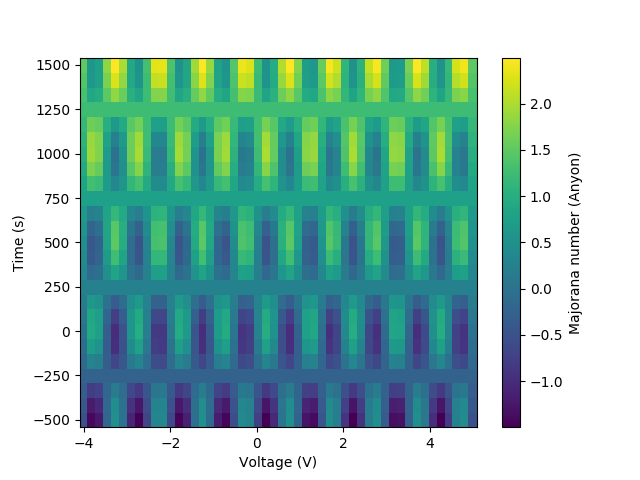

In [18]:
plot = plot_by_id(data_set.run_id)

## Warped 2D rectangular sweep scan

A nice feature of the new dataset is that the grid may be warped; it makes no difference.
Here we warp the x axis of the previous scan to increase the resolution in the right half plane.

In [19]:
data_set = new_data_set('warped-2D-scan')
data_set.add_parameter(x)
data_set.add_parameter(t)
data_set.add_parameter(z)

In [20]:
xvals = np.linspace(-4, 5, 50) + np.cos(2/9*np.pi*xvals+np.pi/4)
tvals = np.linspace(-500, 1500, 25)


for xv in xvals:
    for tv in tvals:
        # just some arbitrary semi good looking function
        zv = np.sin(2*np.pi*xv)*np.cos(2*np.pi*0.001*tv) + 0.001*tv
        data_set.add_result({'x': xv, 't': tv, 'z': zv})

data_set.mark_complete()

<IPython.core.display.Javascript object>


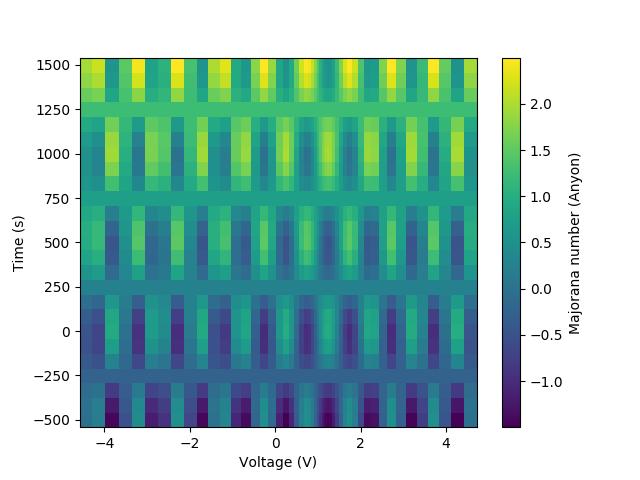

In [21]:
plot = plot_by_id(data_set.run_id)

## Interrupted 2D scans (a hole in the cheese)

In case a sweep in interrupted, the entire grid will not be filled out. This is also supported,
in fact, any single rectangular hole is allowed

In [22]:
data_set = new_data_set('warped-with-hole-2D-scan')
data_set.add_parameter(x)
data_set.add_parameter(t)
data_set.add_parameter(z)

In [23]:
xvals = np.linspace(-4, 5, 50) + np.cos(2/9*np.pi*xvals+np.pi/4)
tvals = np.linspace(-500, 1500, 25)


# define two small forbidden range functions
def no_x(xv):
    if xv > 0 and xv < 3:
        return True
    else:
        return False
    
def no_t(tv):
    if tv > 0 and tv < 450:
        return True
    else:
        return False

for xv in xvals:
    for tv in tvals:
        if  no_x(xv) and no_t(tv):
            continue
        else:
            # just some arbitrary semi good looking function
            zv = np.sin(2*np.pi*xv)*np.cos(2*np.pi*0.001*tv) + 0.001*tv
            data_set.add_result({'x': xv, 't': tv, 'z': zv})

data_set.mark_complete()

<IPython.core.display.Javascript object>


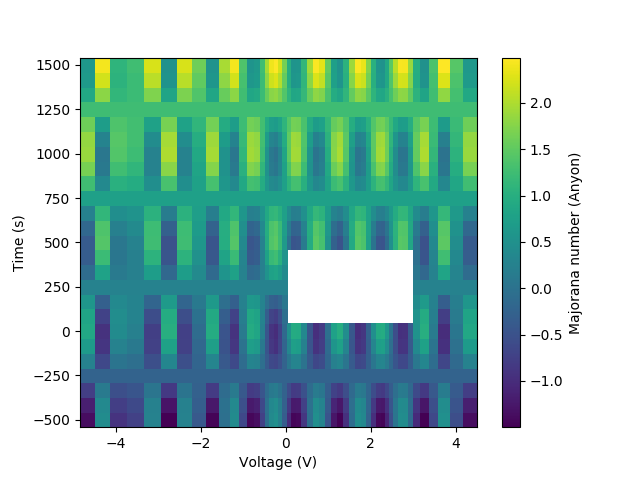

In [24]:
plot = plot_by_id(data_set.run_id)